In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import cv2
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir= '.', untar= True)

In [6]:
data_dir

'./datasets/flower_photos'

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
L = list(data_dir.glob('*/*.jpg'))
L

[PosixPath('datasets/flower_photos/dandelion/5647842237_b1c5196718_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3518608454_c3fd3c311c_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14070457521_8eb41f65fa.jpg'),
 PosixPath('datasets/flower_photos/dandelion/506660896_c903cca1f0.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5598591979_ed9af1b3e9_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8681388520_c697dee897_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/9111669902_9471c3a49c_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19426575569_4b53c0b726.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8905148527_ba9f55cd78.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3446018470_0c40e73ed6_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4552591312_02fe1dcc04_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7162551630_3647eb9254.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3472437817_7902b3d984_n.jpg'),
 PosixPath('datasets/

In [9]:
len(L)

3670

In [10]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3654988152_b11178bbcb.jpg'),
 PosixPath('datasets/flower_photos/roses/4702438868_278b9cf41c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8060338380_eb6c806624_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3663244576_97f595cf4a.jpg'),
 PosixPath('datasets/flower_photos/roses/14154164774_3b39d36778.jpg')]

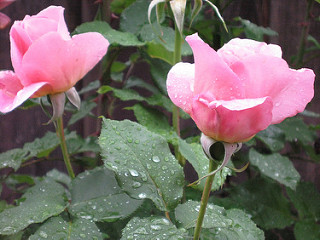

In [11]:
PIL.Image.open(str(roses[100]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/5109508979_68e3530791_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5795159787_ebb51a5e75.jpg'),
 PosixPath('datasets/flower_photos/daisy/5739768868_9f982684f9_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/17101762155_2577a28395.jpg'),
 PosixPath('datasets/flower_photos/daisy/5981645737_29eceac291_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/459931395_24bf6531fe_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/15813862117_dedcd1c56f_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2619413565_61a6cd3ac9_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/12701063955_4840594ea6_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5765646947_82e95a9cc9_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14471433500_cdaa22e3ea_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2539552964_921cf645ba_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/23095658544_7226386954_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3533954656_79156c8473.j

In [15]:
str(flowers_images_dict['daisy'][0])

'datasets/flower_photos/daisy/5109508979_68e3530791_m.jpg'

array([[[ 83,  44,   0],
        [ 83,  44,   0],
        [ 83,  44,   0],
        ...,
        [ 91,  46,   2],
        [ 91,  46,   2],
        [ 91,  46,   2]],

       [[ 83,  44,   0],
        [ 83,  44,   0],
        [ 83,  44,   0],
        ...,
        [ 91,  46,   2],
        [ 91,  46,   2],
        [ 91,  46,   2]],

       [[ 83,  44,   0],
        [ 83,  44,   0],
        [ 83,  44,   0],
        ...,
        [ 89,  47,   0],
        [ 89,  47,   0],
        [ 89,  47,   0]],

       ...,

       [[124,  69,   0],
        [124,  69,   0],
        [124,  69,   0],
        ...,
        [148,  82,   0],
        [148,  82,   0],
        [148,  82,   0]],

       [[124,  69,   0],
        [125,  70,   1],
        [125,  71,   0],
        ...,
        [148,  82,   0],
        [148,  82,   0],
        [148,  82,   0]],

       [[125,  70,   1],
        [125,  70,   1],
        [125,  71,   0],
        ...,
        [148,  82,   0],
        [148,  82,   0],
        [149,  83,   0]]], dtype=uint8)
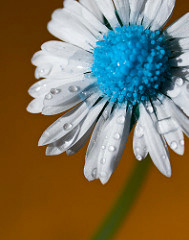

In [16]:
img = cv2.imread(str(flowers_images_dict['daisy'][0]))
img

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
dir(img), img.item

(['T',
  '__abs__',
  '__add__',
  '__and__',
  '__array__',
  '__array_finalize__',
  '__array_function__',
  '__array_interface__',
  '__array_prepare__',
  '__array_priority__',
  '__array_struct__',
  '__array_ufunc__',
  '__array_wrap__',
  '__bool__',
  '__class__',
  '__class_getitem__',
  '__complex__',
  '__contains__',
  '__copy__',
  '__deepcopy__',
  '__delattr__',
  '__delitem__',
  '__dir__',
  '__divmod__',
  '__dlpack__',
  '__dlpack_device__',
  '__doc__',
  '__eq__',
  '__float__',
  '__floordiv__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__getitem__',
  '__gt__',
  '__hash__',
  '__iadd__',
  '__iand__',
  '__ifloordiv__',
  '__ilshift__',
  '__imatmul__',
  '__imod__',
  '__imul__',
  '__index__',
  '__init__',
  '__init_subclass__',
  '__int__',
  '__invert__',
  '__ior__',
  '__ipow__',
  '__irshift__',
  '__isub__',
  '__iter__',
  '__itruediv__',
  '__ixor__',
  '__le__',
  '__len__',
  '__lshift__',
  '__lt__',
  '__matmul__',
  '__mod__',
  '__mul

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
   for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [20]:
X[:5], y[:5]

([array([[[  6,   5,  45],
          [  6,   5,  45],
          [  8,   7,  47],
          ...,
          [ 11,  10,  36],
          [ 12,   9,  40],
          [ 13,   9,  44]],
  
         [[  6,   5,  45],
          [  8,   7,  47],
          [ 12,  11,  51],
          ...,
          [ 11,  12,  33],
          [  9,   9,  34],
          [ 13,  11,  41]],
  
         [[  7,   5,  45],
          [  8,   7,  47],
          [ 12,  10,  50],
          ...,
          [ 17,  18,  39],
          [ 10,  11,  33],
          [ 12,  12,  36]],
  
         ...,
  
         [[ 64,  91, 117],
          [ 41,  63,  90],
          [ 33,  52,  80],
          ...,
          [ 89,  99, 147],
          [ 92, 102, 150],
          [ 92, 100, 151]],
  
         [[ 68,  94, 125],
          [ 55,  75, 107],
          [ 36,  53,  86],
          ...,
          [ 91, 100, 149],
          [ 77,  86, 137],
          [ 82,  90, 144]],
  
         [[ 50,  73, 109],
          [ 50,  68, 106],
          [ 41,  57,  94

In [21]:
X = np.array(X)
y = np.array(y)

X[:2], y[:2]

(array([[[[  6,   5,  45],
          [  6,   5,  45],
          [  8,   7,  47],
          ...,
          [ 11,  10,  36],
          [ 12,   9,  40],
          [ 13,   9,  44]],
 
         [[  6,   5,  45],
          [  8,   7,  47],
          [ 12,  11,  51],
          ...,
          [ 11,  12,  33],
          [  9,   9,  34],
          [ 13,  11,  41]],
 
         [[  7,   5,  45],
          [  8,   7,  47],
          [ 12,  10,  50],
          ...,
          [ 17,  18,  39],
          [ 10,  11,  33],
          [ 12,  12,  36]],
 
         ...,
 
         [[ 64,  91, 117],
          [ 41,  63,  90],
          [ 33,  52,  80],
          ...,
          [ 89,  99, 147],
          [ 92, 102, 150],
          [ 92, 100, 151]],
 
         [[ 68,  94, 125],
          [ 55,  75, 107],
          [ 36,  53,  86],
          ...,
          [ 91, 100, 149],
          [ 77,  86, 137],
          [ 82,  90, 144]],
 
         [[ 50,  73, 109],
          [ 50,  68, 106],
          [ 41,  57,  94],
   

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

len(X_train), len(X_test)

(2752, 918)

In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.2934 - loss: 1.8466
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 973ms/step - accuracy: 0.5488 - loss: 1.0927
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 969ms/step - accuracy: 0.6425 - loss: 0.8979
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 959ms/step - accuracy: 0.7278 - loss: 0.7255
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 983ms/step - accuracy: 0.8043 - loss: 0.5381
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 963ms/step - accuracy: 0.8789 - loss: 0.3487
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 955ms/step - accuracy: 0.9379 - loss: 0.2157
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 966ms/step - accuracy: 0.9656 - loss: 0.1345
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 969ms/step - accuracy: 0.9838 - loss: 0.0692
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 985ms/step - accuracy: 0.9755 - loss: 0.0727


In [25]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - accuracy: 0.6208 - loss: 1.9909


[1.9781452417373657, 0.6176470518112183]

In [26]:
# Here we see that while train accuracy is very high (99%), the test accuracy
# is significantly low (66.99%) indicating overfitting. Let's make some predi
# ctions before we use data augmentation to address overfitting

In [27]:
prediction = model.predict(X_test_scaled)
prediction[:5]

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step


array([[7.20998878e-03, 1.02965232e-05, 7.28236198e-01, 6.12499611e-03,
        2.58418560e-01],
       [2.08934830e-06, 1.79459191e-11, 1.92596199e-04, 9.95947182e-01,
        3.85803799e-03],
       [8.46249259e-06, 4.67521950e-08, 8.84761976e-04, 9.98941958e-01,
        1.64816927e-04],
       [4.34248941e-03, 1.12410786e-03, 6.23859465e-01, 1.05667494e-01,
        2.65006304e-01],
       [1.06766965e-05, 3.08383824e-05, 9.99391437e-01, 4.90014325e-04,
        7.70475526e-05]], dtype=float32)

In [28]:
np.argmax(prediction[2]), y_test[2]

(3, 3)

### Improve Test Accuracy Using Data Augmentation

In [29]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

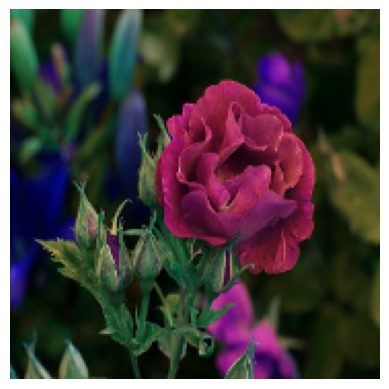

In [30]:
plt.axis('off')
plt.imshow(X[1])

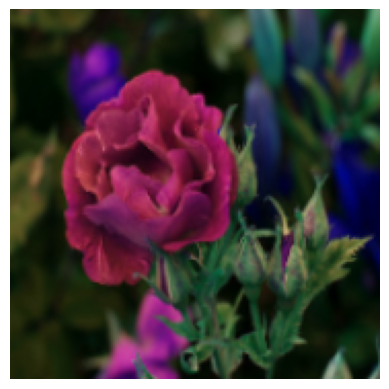

In [31]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))

In [32]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

model.evaluate(X_test_scaled, y_test)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.2798 - loss: 1.6671
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5360 - loss: 1.1541
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5796 - loss: 1.0466
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5995 - loss: 0.9950
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6342 - loss: 0.9060
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6720 - loss: 0.8329
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.6814 - loss: 0.8170
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6943 - loss: 0.7819
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6954 - loss: 0.7717
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7010 - loss: 0.7606
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.6546 - loss: 0.8783


[0.912467360496521, 0.656862735748291]